 Unit 6, Lecture 2
 ===

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feb 22 2018

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib

Break Statements
====
Sometimes you may want to stop a `for` loop early. This may be done with a `break` statement:

In [2]:
#Iterate through my favorite pets
best_pets = ['fox', 'cat', 'dog', 'crow']
index = 0 #Keep track of the index
for pet in best_pets:
    print(pet, index)
    index += 1

fox 0
cat 1
dog 2
crow 3


In [3]:
#Now stop and report the dog index
best_pets = ['fox', 'cat', 'dog', 'crow']
index = 0
for pet in best_pets:
    if pet == 'dog':
        print('The dog has index {}'.format(index))
        break
    index += 1
    
print(best_pets[index])

The dog has index 2
dog


Here's an example where we want to know when summing integers reaches 50

In [4]:
#Sum integers and stop when the sum is 50
ints = range(100)
isum = 0
for i in ints:
    isum += i
    if(isum > 50):
        break

print('{} was the integer that pushed us over 50'.format(i))

10 was the integer that pushed us over 50


While loops
====
Python loops are called `for-each` loops in most other programming languages. That's because they require a list or array to do a `for` loop. You may not always have an array handy, or you many not know how big the array will need to be. For example

In [5]:
#Sum integers and stop when the sum is 10000
ints = range(100)
isum = 0
for i in ints:
    isum += i
    if(isum > 10000):
        break

print('{} was the integer that pushed us to {}'.format(i, isum))

99 was the integer that pushed us to 4950


We needed to know before starting the loop how many integers to loop over!

We can get around this using a `while` loop

In [6]:
i = 0
isum = 0
while isum < 10000:
    isum += i
    i += 1
print('{} was the integer that pushed us to {}'.format(i, isum))

142 was the integer that pushed us to 10011


Computing Prediction Intervals
====

Now that we know how to `break` or use a `while` loop, we can return to the problem of computing prediction intervals. Consider our geometric distribution from yesterday:

$$P(n) = (1 - p)^{n - 1}p$$

Assuming $p=0.1$. Find the smallest $x$ such that:
$$ P(n < x) \geq 0.9$$

First, let's just sum to $1$ to make sure our code is correct

In [7]:
Q = range(1, 100)
p = 0.1
psum = 0
for n in Q:
    psum += (1 - p) ** (n - 1) * p
print(psum)

0.9999704873345701


Now we'll stop early, when we've reached the $0.9$ probability.

$$ \min_x \sum_i^x P(i) \geq 0.9$$
$$ \min_x \sum_i^x (1 - p)^{i - 1}p \geq 0.9$$

I write min, because otherwise you could trivially just pick $x= \infty$ which is not what we want.

In [1]:
Q = range(1, 100)
p = 0.1
psum = 0
for n in Q:
    psum += (1 - p) ** (n - 1) * p
    if(psum >= 0.9):
        break
print('The number which pushed our sum over 0.9 is {}. The sum is {}'.format(n, psum))

The number which pushed our sum over 0.9 is 22. The sum is 0.9015229097816391


*With a prediction level of 90%, success will occur within 22 trials/attempts*

*The 90% prediction interval is [1,22]*

Scipy Stats
----

There is a library, that we will gradually begin to use, that has all distributions and utilities for prediction intervals. Use it sparingly until you understand the concepts well

In [17]:
#geometric probability of 5 with p=0.2
p = 0.2
n = 5
(1 - p )**(n - 1) * p

0.08192000000000002

In [18]:
from scipy import stats as ss

ss.geom.pmf(5, p=0.2)

0.081920000000000021

You can plot, since this is a `numpy` supporting library

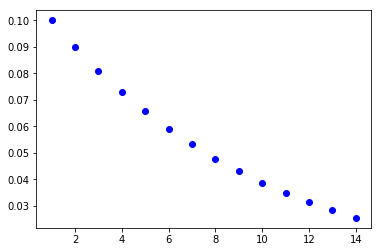

In [19]:
n = np.arange(1,15)
pn = ss.geom.pmf(n, p=0.1)
plt.plot(n, pn, 'bo')
plt.show()

Scipy stats has all the cumulative distributions as well.

In [20]:
#amount of probability between n=1 (inc) and n=22
ss.geom.cdf(22, p=0.1)

0.90152290978163885

Finally, there is a function to ask about prediction intervals.

In [21]:
#what should the rv for the cdf be a certain number?

In [22]:
ss.geom.ppf(0.9, p=0.1)

22.0

For now, I will have you use scipy stats to check your work. You may not use it on homework unless specified or you're working with the normal distribution.

One note about scipy stats is that you need to visit the documentation website to get complete function help. The docstrings often don't provide enough info.

Working with the Normal Distribution
====

Recall the equation:

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

There is not much to do with this equation however, since we must integrate it to compute probabilities

Computing Probability of Interval
===

Recall that for continuous probability disributions:

$$P(a < x < b) = \int_a^b p(x) \, dx$$

For a normal distribution, let's try $\mu = 2$, $\sigma = 0.5$. What is the probability of a sample falling between $2$ and $3$?

$$P(2 < x < 3) = \int_2^3 \frac{1}{\sqrt{2\pi0.5^2}} e^{-\frac{(x - 2)^2}{2\times0.5^2}}  \, dx$$



We can use the `ss.norm.cdf`, where CDF is the cumulative distribution function. This is the definition of the CDF:

$$ CDF(x) = \int_{-\infty}^x p(x')\,dx'$$

Using some math, you can show that:

$$P(a < x < b) = CDF(b) - CDF(a)$$

so for our example:

In [1]:
from scipy import stats as ss
prob = ss.norm.cdf(3, scale=0.5, loc=2) - ss.norm.cdf(2, scale=0.5, loc=2)
print(prob)

0.477249868052


Standard Normal Distribution
====

In the olden days, someone made a table for all these integrals and it is called a $Z$ table. We won't use Z tables, but the concept is important and I'm making you learn it. 

Since different normal distributions have different means and such, they invented the idea of Standard Normal Distributions:

$$
Z = \frac{x - \mu}{\sigma}
$$

and then you use this $Z$ as being a sample in the $\cal{N}(0,1)$ distribution. These are called $Z$ scores. The input, $x$, should always be the bounds of some interval. $Z$ scores are not used to compute probability densities, only for intervals to compute probabilities. 

Let's see how this looks. Let's say we have a random variable distributed according to $\cal{N}(-2, 3)$. That is a shorthand for $\mu=-2$, $\sigma = 3$. Let's say we want to know $P( x > 0)$. We can rewrite that as:

$$P(x > 0) = 1 - P(x < 0) = 1 - \int_{-\infty}^0 \cal{N}(-2, 3) \, dx$$

Now it's in a form where we can use the CDF:


In [4]:
1 - ss.norm.cdf(0, scale=3, loc=-2)

0.25249253754692291

Now we can do the same problem using $Z$-scores. Let's compute the $Z$-score:

$$Z = \frac{x - \mu}{\sigma} = \frac{0 - -2}{3} = \frac{2}{3}$$

In [5]:
Z = 2 / 3.
1 - ss.norm.cdf(Z)

0.25249253754692291

Notice that by default, `scipy` assumes a standard normal distribution!

Normal Distribution Examples
----

The amount of snowfall today has an expected value of 5 inches and a standard deviation of 1.5 inches. What's the probability of getting between 3 and 5 inches?

Let's do this with $Z$ scores. 

$$Z_{hi} = \frac{5 - 5}{1.5}$$

$$Z_{lo} = \frac{3 - 5}{1.5}$$

$$P(3 < x < 5) = \int_{Z_{lo}}^{Z_{hi}} \cal{N}(0,1)\,dx$$

In [6]:
Zhi = (5 - 5)/1.5
Zlo = (3 - 5)/1.5

prob = ss.norm.cdf(Zhi) - ss.norm.cdf(Zlo)

print(prob)

0.408788780274


Checking the assumption of a normal distribution
---

Remember that the normal distribution presumes a sample space of $(-\infty, \infty)$. We can't have snow return to the sky, so how bad is our assumption that snowfall is normal?

We can estimate how bad it is, by seeing what the probability of having negative snowfall is.

$$P(x < 0) = \int_{-\infty}^{0} \cal{N}(5,1.5)$$

In [7]:
ss.norm.cdf(0, loc=5, scale=1.5)

0.00042906033319683719

In [8]:
Z = (0 - 5)/1.5
ss.norm.cdf(Z)

0.00042906033319683719

Looks great! There is about as much a chance of negative snowfall in our equation as reality.

Visualizing the Normal Distribution
-----

Let's  try to understand the different terms. The prefactor is just for normalization. We'll write it as $Q$. The exponent is a distance measuring function, we'll call it $d(x)$:


$$ \cal{N}(\mu, \sigma) = Qe^{-d(x)}$$

$$d(x) = \frac{(\mu - x)^2}{2\sigma^2}$$

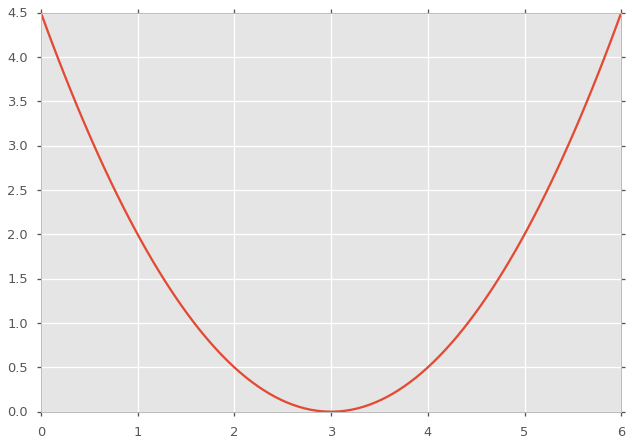

In [14]:
sigma = 1.
mu = 3
x = np.linspace(0,6, 100)
dist = (mu - x)**2 / (2 * sigma**2)

plt.plot(x, dist)
plt.show()

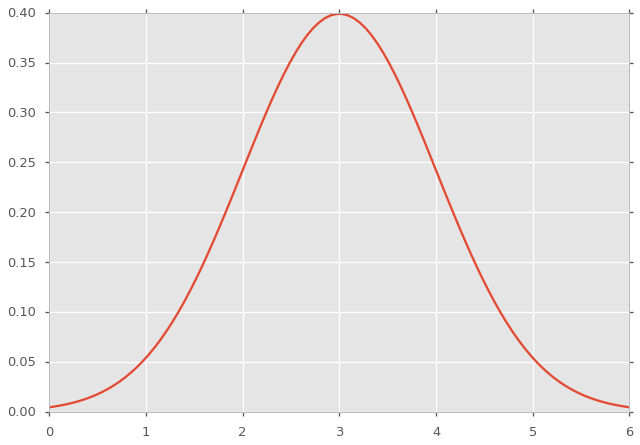

In [16]:
from math import *

Q = 1 / np.sqrt(2 * sigma**2 * pi)
norm = Q * np.exp(-dist)

plt.plot(x, norm)
plt.show()

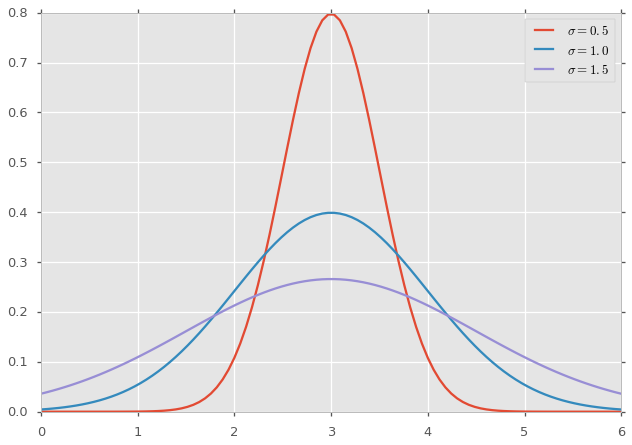

In [20]:
plt.plot(x, ss.norm.pdf(x, loc=3, scale=0.5), label=r'$\sigma=0.5$')
plt.plot(x, ss.norm.pdf(x, loc=3, scale=1.0), label=r'$\sigma=1.0$')
plt.plot(x, ss.norm.pdf(x, loc=3, scale=1.5), label=r'$\sigma=1.5$')
plt.legend()
plt.show()

Prediction Intervals
===

What if instead of knowing how probable an interval is, we want to find an interval that matches a given probability? This is called a prediction interval, and is something we learned for discrete distributions last time.

Prediction Interval Example
----

What's the highest amount of snowfall with 99% probability?

In [2]:
ss.norm.ppf(0.99, scale=1.5, loc=5)

8.4895218110612607

So a single sample will fall between $-\infty$ and $8.5$ with 99% probability

To flip your interval, you have to rely on normalization. Let's say we want the lowest amount of snowall with 99% probability. We can flip that and say instead we want the highest snowfall with 1% probability

In [3]:
ss.norm.ppf(0.01, scale=1.5, loc=5)

1.5104781889387389

So the snow will be between $-\infty$ and 1.5 inches with 1% probability, and from normalization be between 1.5 and $\infty$ with 99% probability. 